In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from utils.plot_utils import *
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
result_dir = "res/models-nv" # here are the results
m=100
plot_dir = "plots" # her go the plots
latex = True # using latex?

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

if latex:
  latexify()

## Import the available results from ```result_dir```

In [3]:
df = []
results = []
for d in os.listdir(result_dir):
    params = d.split('__')
    res = {p.split('=')[0]: p.split('=')[1] for p in params}
    try:
      df_ = pd.read_csv(result_dir + "/" + d + "/train_log").drop(columns=["Unnamed: 0"])
      res["db"] = df_["test_dbs"].min()
      res["dir"] = d
      res["hist"] = df_["test_dbs"]
      results.append(res)
    except:
      print(f"This job has not yet finished, but folder was created: {d}")
      
df = pd.DataFrame(results)
df.head();

## Vary k for N=256 and 10dB

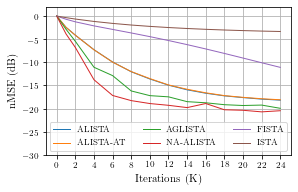

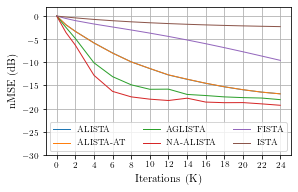

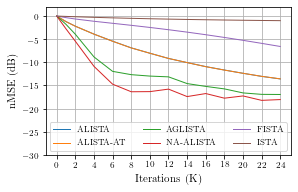

In [4]:
for m in [100,75,50]:
    df_ = df[df['m']==str(m)]
    for n in [256]:
      
      for noisefn, yticks, ymin in [["GaussianNoise10", range(-30, 5, 5), -30]]:
          df_ = df_[df_["noise"] == noisefn]
          df_ = df_[df_["n"]==str(n)]
          for alg, label, linestyle in [["ALISTA", "ALISTA", "--"], ["ALISTA_AT", "ALISTA-AT", ":"], ["AGLISTA", "AGLISTA", "-"], ["NA_ALISTA_UR_128", "NA-ALISTA","-"], ["FISTA", "FISTA", "-"], ["ISTA", "ISTA", "-"]]:
                  df_alg = df_[df_["model"] == alg]
                  x_ = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16,18,20,22,24]
                  x = [0]
                  y = [0]
                  for k in x_[1:]:
                      try:
                          y.append(df_alg[df_alg["k"]==str(k)]["db"].values[0])
                          x.append(k)
                      except Exception as e:
                          print(f"WARNING: Still missing k={k} for {alg}.")
                  plt.plot(x, y, label=label, linewidth=1)

          plt.ylim(ymin, 2)
          plt.yticks(yticks)
          plt.xticks(range(25)[::2])
          plt.legend(loc=3, ncol=3)
          plt.ylabel("nMSE (dB)")
          plt.xlabel("Iterations (K)")
          plt.grid()
          plt.savefig(os.path.join(plot_dir, f"comm_varyk__n={n}_noise={noisefn}_m={m}.pdf"), bbox_inches='tight', pad_inches=0.05)
          plt.show()
